In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from helpers.utilities import *

In [2]:
from os import chdir
chdir('..')

In [3]:
%%capture
%load_ext rpy2.ipython
%R require(ggplot2)

# Protein levels

Protein levels were measured with SOMAscan platform (SomaLogic company) in version measuring 1.3k proteins.

SOMAscan uses peptide aptamers (short, target specific protein fragments) binding for protein level quantification[1]:
 - designed for ~1.3k human proteins[1], with a newer version [capable of measuring ~5k human proteins](https://somalogic.com/somalogic-launches-new-version-somascan-assay/)
 - The company [claims](http://somalogic.com/wp-content/uploads/2017/06/SSM-002-Technical-White-Paper_010916_LSM1.pdf) achieving high dynamic range (10^8) and the readouts being directly proportional to protein concentrations
 - "Many of the proteins are either secreted or known to be shed from the cell surface, and thus the platform is particularly well suited for plasma biomarker discovery." [(Ngo, et al. 2016)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4963294/)

Were there any previous studies on related diseases, sample types (CSF as in contrast to blood), and validated for application to signal from (potentially) multiple organisms?
 - previously applied to other species (e.g. mouse)[1] - taking advantage of non-specificity to human proteins/close homology of some mammal proteins; the [company report](http://www.somalogic.com/wp-content/uploads/2016/09/SSM-019-Rev-4-SOMAmer-tech-note-nonhuman-sample.pdf) demonstrates that non-human orthologs from dog, rat, cat and mouse can be used to measure levels of certain proteins in these species    
 - previously applied to TB:
   - [Sequential inflammatory processes define human progression from M. tuberculosis infection to tuberculosis disease](https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1006687) - may be worth looking at as they also used both: SOMAscan and RNA-Seq data (plus the data are published in GEO!),
   - [Highly Multiplexed Proteomic Analysis of Quantiferon Supernatants To Identify Biomarkers of Latent Tuberculosis Infection](https://jcm.asm.org/content/55/2/391.long)
 - applications to CSF: [Neuro Psychiatric SLE patients (somehow related to meningitis)](http://www.jimmunol.org/content/200/1_Supplement/100.11) just an abstract!, [Alzheimer study](https://alzres.biomedcentral.com/articles/10.1186/s13195-017-0258-6) in which many differentially expressed pathways were in agreement with previous studies (which supports the case for application of SOMAscan to CSF).
 - The company [was developing some of its reagents](https://somalogic.com/somalogic-announces-extension-of-funding-for-devel/) specifically with intent to diagnose for TB for many years, which was funded by the Bill & Melinda Gates foundation.
 - The SOMAscan was qualified for use with CSF for biomarker discovery according to [the technical whitepaper](http://somalogic.com/wp-content/uploads/2017/06/SSM-002-Technical-White-Paper_010916_LSM1.pdf).
 
Technical validation and updates:
 - ["Assessment of Variability in the SOMAscan Assay", 2017](https://www.nature.com/articles/s41598-017-14755-5) report discusses the variability, data processing and normalization for SOMAscan, importantly sharing the data for variability. They compare performance on serum and plasma across multiple plates. 
 - According to the company that coefficient of variation in healthy humans has [median of 4.6% and 2.9% for plasma and serum respectively](http://somalogic.com/wp-content/uploads/2017/06/SSM-046-Rev-2-Verification-and-Validation-of-the-SOMAscan-Assay-1.3k.pdf) (n=166) which is consistent with the findings of above mentioned study
 - ["Complementarity of SOMAscan to LC-MS/MS and RNA-seq for quantitative profiling of human embryonic and mesenchymal stem cells", 2017](https://www.sciencedirect.com/science/article/pii/S1874391916304006) compares SOMAscan to traditional platforms. I have not read this one yet.
 - SomaLogic released updates, informing customers of removal and changes in the reagents[1]. An [update from 2016](https://metabolomics.helmholtz-muenchen.de/pgwas/locuscards/updates/SSM-064_Rev_0_DCN_16-263.pdf) explains removal of five reagents due to specificity issues
 - A [technical note from SomaLogic (2017)](http://www.somalogic.com/wp-content/uploads/2017/01/SSM-067-Rev-1-Technical-Note-Characterization-of-SOMAmer-Reagents-Binding-Specificity-in-the-SOMAscan-1.3k-Assay.pdf) characterizes specificity for the proteins in 1.3k panel; specificity measured against related proteins was confirmed for 53% of the reagents at the time. Not a bad number, but I believe that we need to be cautious as that did not test cross-species mixtures!
 - https://www.nature.com/articles/s41598-018-26640-w
 
Other useful resources:
 - [Web Tool for Navigating and Plotting SomaLogic ADAT Files](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.166/) allow to visualize raw ADAT files (the files with raw data which I did not get); the website generates PCA, heatmaps for HCA and other plots and was originally hosted by NCI. Importantly there is a source code available to consult and trouble-shoot in case of any problems with SOMAscan-specific analysis/visualizations: https://github.com/foocheung/adat (Apache-2.0 license).

1. https://www.nature.com/articles/s41598-017-14755-5

**It might be useful to learn about the normalization procedures employed for SOMAscan.** What I would worry about is how they handled samples i.e. if these were placed on a single or multiple plates and what normalization followed. 

Overall the platform has a good performance but I am worried about the effect of non-specific binding of bacterial or viral proteins, which seems that was not tested before (the validation studies were all performed on healthy humans). On the other hand, if the signal for a protein is strong and discriminates TBM patients from other ones, it is a useful biomarker anyway (though with validity potentially restricted to this specific platform).

Articles addressing my concern of non-specific bacterial/fungal/viral protein binding:
 - [Potential of high-affinity, Slow Off-Rate Modified Aptamer (SOMAmer) reagents for Mycobacterium tuberculosis proteins as tools for infection models and diagnostic applications."](https://www.ncbi.nlm.nih.gov/pubmed/28794178) - attempted to create a diagnostic test for TB using novel aptamers (created specifically for Mycobacterium proteins); in serum/urine concentrations of TB proteins were too low - and this is a hint that I need not worry greatly (as even SomaLogic scientists were not able to pick up signal from MTB using novel aptamers), but again they did not try CSF nor did they systematically check the aptamers from the 1.3k assay for noise from unspecific binding)

I barely skimmed the topic, looking for things relevant to data cleaning and validation, will continue the review later.


In [4]:
protein_levels = read_csv('data/clean/protein/levels.csv', index_col=[0,1,2,3])

In [5]:
protein_levels

,,,,149.TMD,007.TMD,001.TMD,064.TMD,151.TMD,...,177.HC,189.HC,217.HC,221.HC,245.HC
soma_id,target_full_name,target,entrez_gene_symbol,,,,,,,,,,,
SL019100,E3 ubiquitin-protein ligase CHIP,CHIP,STUB1,174.1,521.1,57.0,158.1,62.1,...,12.6,11.4,12.2,15.8,22.2
SL007136,CCAAT/enhancer-binding protein beta,CEBPB,CEBPB,53.3,283.6,36.1,126.6,33.7,...,10.4,9.7,9.6,11.0,15.1
SL001731,Gamma-enolase,NSE,ENO2,11621.6,26883.3,10123.9,12015.4,3734.6,...,7699.7,5601.8,6421.7,8314.3,16016.8
SL019096,E3 SUMO-protein ligase PIAS4,PIAS4,PIAS4,50.9,177.8,31.6,75.3,25.5,...,11.0,10.7,9.6,10.8,17.0
SL005173,Interleukin-10 receptor subunit alpha,IL-10 Ra,IL10RA,174.6,385.3,116.8,192.7,104.0,...,50.2,46.9,44.9,53.3,82.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL003066,Pigment epithelium-derived factor,PEDF,SERPINF1,185698.9,199804.1,193171.3,208650.7,215160.2,...,177535.0,192301.2,206157.5,226385.4,159321.2
SL008381,Cathepsin F,CATF,CTSF,951.8,2055.0,1290.1,1958.2,914.1,...,1535.7,1198.8,970.8,1465.3,2022.2
SL018900,Formimidoyltransferase-cyclodeaminase,FTCD,FTCD,52.1,161.3,27.3,70.2,20.8,...,21.2,19.7,18.6,18.4,21.2


### Can we get better ids for the proteins?

The Ensembl gene id is on the gene level so not necessarily accurate. Can we get better?

Yes: the aptamers metadata is available in R package "readat"

In [6]:
%%R -o aptamers
library(readat)

In [7]:
aptamers.head()

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
1,4829-43,SL001737,STRATIFIN,14-3-3 protein sigma,P31947,...,Protein,40.0,40.0,1,1
2,3804-66,SL007403,DMP1,Dentin matrix acidic phosphoprotein 1,Q13316,...,Protein,40.0,40.0,0,1
3,3814-63,SL007423,IL-11 RA,Interleukin-11 receptor subunit alpha,Q14626,...,Protein,40.0,40.0,0,1
4,14156-33,SL004815,14-3-3 protein beta/alpha,14-3-3 protein beta/alpha,P31946,...,Protein,1.0,1.0,1,0
5,7625-27,SL008071,14-3-3 protein theta,14-3-3 protein theta,P27348,...,Protein,1.0,1.0,1,0


In [8]:
relevant_aptamers = aptamers[
    aptamers.SomaId.isin(protein_levels.index.get_level_values('soma_id'))
    &
    (aptamers.IsIn1310Panel == 1)
]
len(relevant_aptamers)

1305

In [9]:
'7596-2' in relevant_aptamers.AptamerId

False

#### Were the five deprecated targets already excluded?

It would seem so as there are only 1305/1310 rows. See [SSM-064 Rev 0 DCN 16-263](https://metabolomics.helmholtz-muenchen.de/pgwas/locuscards/updates/SSM-064_Rev_0_DCN_16-263.pdf) for details.

In [10]:
deprecated_targets = ['2795-23', '3590-8', '5071-3', '5118-74', '5073-30']
relevant_aptamers.query('AptamerId in @deprecated_targets').empty

True

Just to make sure, I double-check using full names and the other data frame:

In [11]:
deprecated_target_names = [
    'Alkaline phosphatase, tissue-nonspecific isozyme',
    'Complement C1s subcomponent',
    'Reticulon-4',
    'Desmoglein-2',
    'Tumor necrosis factor receptor super-family member 25'
]
protein_levels.query('target_full_name in @deprecated_target_names').empty

True

Great!

#### The variability coefficients for confidence assessment of particular target measurements

The variability study[1] resulted in creation of a website: [foocheung.shinyapps.io/SOMACV3](https://foocheung.shinyapps.io/SOMACV3/) which enables checking the variability of measurements for each of the reagents.

Unfortunately, these data are only available for serum and plasma and I did not find an easy way to download the data in bulk.

In [12]:
from statsmodels.graphics.gofplots import qqplot_2samples

In [13]:
from helpers.data_frame import select_columns

### Which patients are in there?

In [14]:
protein_levels.columns.str.split('.').str[1].value_counts()

HC     25
CM     24
TMD    13
TMR     7
VM      7
TMS     6
dtype: int64

### What is the distribution of the measurments?

The quantile-quantile distribution between healthy controls and all the other samples:

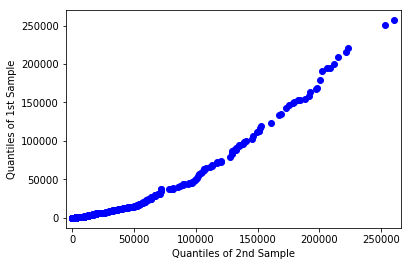

In [15]:
qqplot_2samples(
    select_columns(protein_levels, match='.*HC').mean(axis=1),
    select_columns(protein_levels, exclude='.*HC').mean(axis=1)
);

No striking outliers.

#### Are the average protein levels normally distributed?

In [16]:
average_protein_level = select_columns(protein_levels, '.*HC').mean(axis=1)

In [17]:
average_protein_level.head()

soma_id   target_full_name                       target    entrez_gene_symbol
SL019100  E3 ubiquitin-protein ligase CHIP       CHIP      STUB1                    15.104
SL007136  CCAAT/enhancer-binding protein beta    CEBPB     CEBPB                    12.424
SL001731  Gamma-enolase                          NSE       ENO2                  10619.304
SL019096  E3 SUMO-protein ligase PIAS4           PIAS4     PIAS4                    12.604
SL005173  Interleukin-10 receptor subunit alpha  IL-10 Ra  IL10RA                   76.396
dtype: float64

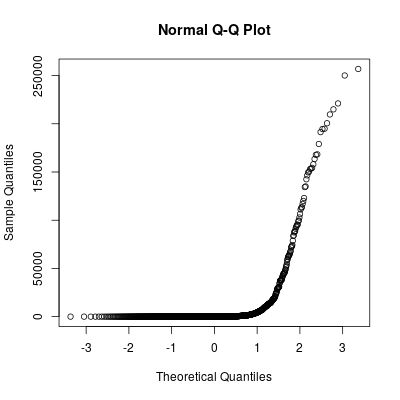

In [18]:
%%R -i average_protein_level -w 400 -h 400 -u px
qqnorm(average_protein_level)

Nope. This may be expected given the high dynamic range of the platform; it also tells us that there are many values close to zero:

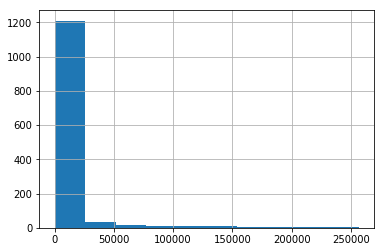

In [19]:
average_protein_level.hist();

### Does it follow log-normal distribution?

In [20]:
df = DataFrame(dict(average_protein_level=average_protein_level))

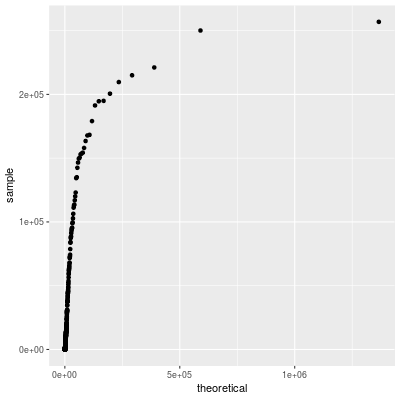

In [21]:
%%R -i df -w 400 -h 400 -u px
(
    ggplot(df, aes(sample=average_protein_level))
    + qqplotr::stat_qq_point(distribution='lnorm')
)

Not great, though better.

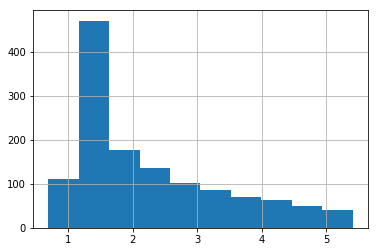

In [22]:
from numpy import log10
average_protein_level.apply(log10).hist();

#### Were there any useful notes in methods section of previous studies utilizing SOMAscan?

- "Protein levels were natural log transformed prior to batch effects adjustment to improve the normality of protein level distributions" - https://www.nature.com/articles/s41598-018-26640-w
- "All protein values were log transformed because of their nonnormal distributions as determined by the Kolomogorov-Smirnov and Shapiro-Wilk normality tests" - [Aptamer-Based Proteomic Profiling Reveals Novel Candidate Biomarkers and Pathways in Cardiovascular Disease
](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4963294/) (I don't quite get the reasoning of this sentence - non-normality does not imply log-normal distribution, regardless of the tests that you use)
- "all CSF and plasma protein values measured in untargeted and targeted proteomic experiments were log10 transformed" [The Alzheimer study](https://alzres.biomedcentral.com/articles/10.1186/s13195-017-0258-6)
- "Prior to analysis, NMR lipoprotein and plasma proteome data were transformed to Z-scores (by subtracting the mean and dividing by the SD) for ease of comparison. Plasma proteome data were log-transformed prior to Z-score transformation." [
(Harbaum, et al., 2019)](https://thorax.bmj.com/content/74/4/380) **this is a fresh study from Imperial College London**, and two of the authors are affiliated with the Department of Surgery and Cancer
- "Data from all samples were log2 transformed, normalized and calibrated using standard hybridization and calibration procedures." [(Scribe et al, 2017)](https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1006687) - some authors affiliated with SomaLogic, NB this is also a Cape Town study.
- "All data were log-transformed to stabilize the variance. [...] Student's t tests were used to identify differentially expressed SOMAmer reagents" [(Groote, et al. 2017)](https://jcm.asm.org/content/55/2/391.long) - again in collaboration with SomaLogic.

There is a strong case for log-transformation, as it was frequently used in previous research. The base, however, varies.

I was specifically interested to see if anyone used Van der Waerden transformation before, as it could correct the skew (as partially does the log transformation). Here are two more articles:

- "All proteomics data were transformed using the natural logarithm and transformed to zero mean and unit s.d. In addition, protein values >2.5 s.d. from the mean were excluded as outliers." - this sounds like an exclusion of a lot of signal; in supplementary information: "This [modeling] was performed on the SOMAscan data, both untransformed, and transformed using the Van der Waerden transformation" -  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4490288/
- "We log10 transformed the protein data as the protein concentrations were not normally distributed. Additionally, protein values ± 6 SDs were excluded as outliers." - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4469006/ (same authors, previous article)


At least two studies first log-transformed and then scaled to z-scores.

Alternatives to simple log-transform include:
 - Box-Cox
 - quantile normalization / Van de Waerden / rank-based inverse normal transformation; possibly used in [this study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5271178/). There are articles discussing practical benefits and shortcomings of application to GWAS studies (I haven't found discussion relevant to SOMAscan though):
   - for [(Pain et al. 2018)](https://europepmc.org/articles/pmc6057994)
   - against [(Beasley et al. 2009)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2921808/) - I am convinced by some of the arguments, though can't say that I understand it fully (yet).

There seem to be a strong preference for the simplest log transformation in the previous research (though I do not fully understand this choice).

NB: the relative abundances of proteins in cells are known to vary greatly; our samples are not cells from a single tissue but a mixture of different cells and (potentially) organisms. This may influence the distribution of protein levels, and it appears justifiable to suspect that the measured distribution is complex and skewed as it is a sum of multiple distributions (which may or may not be normal). 

### How to normalize the values for use with PLS?

Concern: the high dynamic range  of values 

z-score?

### Which target description is the best for visualisations?

In [23]:
protein_index = protein_levels.index
protein_indices = DataFrame({
    name: protein_index.get_level_values(name)
    for name in protein_index.names
})

In [24]:
protein_indices.apply(lambda index: index.str.len().max())

soma_id                 8
target_full_name      112
target                 40
entrez_gene_symbol     39
dtype: int64

For visualisation purposes I could use the Entrez or target symbols; Later I show that Entrez symbols are not unique, so I opt to use the target symbols.
SOMA ID is short, though not easy to interpret.

Note: The entrez gene symbols are not atomic, which is inherent to the protein biology (multiple genes coding for the same protein)

### Duplicates?

#### In the data

Chances of having exact duplicate in data are very low and this would be suspicious:

In [25]:
assert not protein_levels.duplicated().any()

#### In the indices?

In [26]:
protein_indices.apply(lambda index: index.duplicated().any())

soma_id               False
target_full_name      False
target                False
entrez_gene_symbol     True
dtype: bool

Entrez gene symbol is not unique.

In [27]:
from helpers.data_frame import extract_duplicates, set_duplicates_group

data_duplicates = extract_duplicates(protein_indices, ['entrez_gene_symbol'], ['target_full_name', 'target'])
data_duplicates = set_duplicates_group(data_duplicates, 'entrez_gene_symbol', protein_indices)

full_table(data_duplicates)

target  \
entrez_gene_symbol index                                     
ADCYAP1            1      PACAP-27                           
                   2      PACAP-38                           
APOE               3      Apo E                              
                   4      Apo E3                             
                   5      Apo E4                             
                   6      Apo E2                             
C3                 7      iC3b                               
                   8      C3                                 
                   9      C3adesArg                          
                   10     C3b                                
                   11     C3a                                
                   12     C3d                                
C4A C4B            13     C4b                                
                   14     C4                                 
C5                 15     C5                                 
                   16     C5a                                
CCL23              17     MPIF-1                             
                   18     Ck-b-8-1                           
CLEC11A            19     SCGF-beta                          
                   20     SCGF-alpha                         
EGFR               21     ERBB1                              
                   22     EGFRvIII                           
F10                23     Coagulation Factor Xa              
                   24     Coagulation Factor X               
F2                 25     Thrombin                           
                   26     Prothrombin                        
F9                 27     Coagulation Factor IX              
                   28     Coagulation Factor IXab            
FGA FGB FGG        29     Fibrinogen                         
                   30     D-dimer                            
FGF8               31     FGF-8B                             
                   32     FGF-8A                             
FN1                33     FN1.3                              
                   34     FN1.4                              
                   35     Fibronectin                        
Human-virus        36     HPV E7 Type 16                     
                   37     HPV E7 Type18                      
                   38     HIV-2 Rev                          
                   39     C34 gp41 HIV Fragment              
LTA LTB            40     Lymphotoxin a1/b2                  
                   41     Lymphotoxin a2/b1                  
LYN                42     LYNB                               
                   43     LYN                                
NPPB               44     BNP-32                             
                   45     N-terminal pro-BNP                 
PLG                46     Angiostatin                        
                   47     Plasmin                            
                   48     Plasminogen                        
POMC               49     b-Endorphin                        
                   50     ACTH                               
                   51     Corticotropin-lipotropin           
PPBP               52     NAP-2                              
                   53     CTAP-III                           
PROC               54     Protein C                          
                   55     Activated Protein C                
RPS27A             56     Ubiquitin+1                        
                   57     Ubiquitin                          
SERPINA3           58     a1-Antichymotrypsin                
                   59     alpha-1-antichymotrypsin complex   
VEGFA              60     VEGF                               
                   61     VEGF121                            

                                                               target_full_name  
entrez_gene_symbol index                                       

Major observations:
  - Mostly isoforms in here - good to know!
  - There are viral proteins, e.g. "C34 gp41 HIV Fragment", "Protein Rev_HV2BE"

### Quick check: do we see more of the HIV protein in patients with HIV?

In [28]:
clinical_data = read_csv('data/clean/clinical/data.csv', index_col=0)

Select only patients for whom the protein levels were measured:

In [29]:
clinical_for_protein_study = clinical_data.loc[protein_levels.columns]

In [30]:
patient_hiv_status = clinical_for_protein_study.HIVResult
is_healthy_control = clinical_for_protein_study.condition == 'HC'

As we assume that there are only HIV-1 patients, I expect to see a correlation for "C34 gp41 HIV Fragment" but not necessarily for other viral proteins

In [31]:
viral_proteins = protein_levels.query('entrez_gene_symbol == "Human-virus"')
viral_proteins

,,,,149.TMD,007.TMD,001.TMD,064.TMD,151.TMD,...,177.HC,189.HC,217.HC,221.HC,245.HC
soma_id,target_full_name,target,entrez_gene_symbol,,,,,,,,,,,
SL004697,Protein E7_HPV16,HPV E7 Type 16,Human-virus,51.0,201.5,39.4,76.6,29.7,...,14.8,11.6,13.8,12.4,20.1
SL004698,Protein E7_HPV18,HPV E7 Type18,Human-virus,117.7,682.7,68.3,199.2,87.9,...,28.1,30.6,28.4,25.7,31.5
SL000445,Protein Rev_HV2BE,HIV-2 Rev,Human-virus,20.5,48.5,19.7,32.5,13.8,...,13.0,14.6,13.3,11.6,14.8
SL016148,"gp41 C34 peptide, HIV",C34 gp41 HIV Fragment,Human-virus,212.9,368.4,347.6,261.4,105.7,...,183.5,92.3,130.2,174.2,416.8


In [32]:
df = viral_proteins.stack().reset_index().rename({'level_4': 'patient_id', 0: 'value'}, axis=1)

In [33]:
df['patient_hiv_status'] = df.patient_id.map(patient_hiv_status)
df['is_healthy_control'] = df.patient_id.map(is_healthy_control)

are there any HIV-1 positive healthy controls?

In [34]:
(is_healthy_control & (patient_hiv_status == 'Positive')).value_counts()

False    63
True     19
dtype: int64

In [35]:
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger

In [36]:
rpy2_logger.addFilter(lambda record: 'notch went outside hinges' in record.msg)

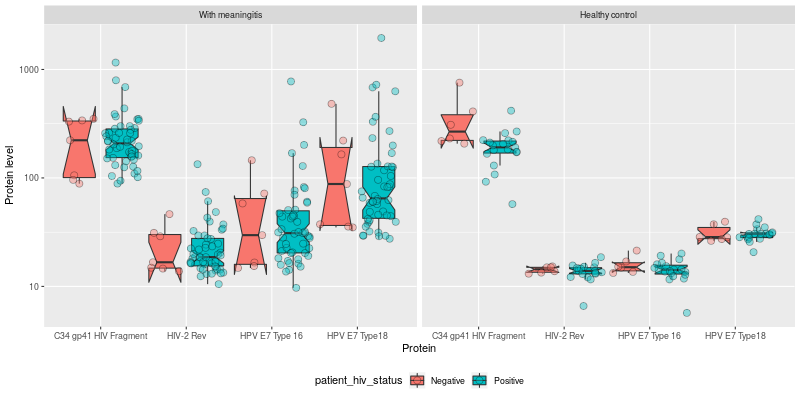

In [37]:
%%R -i df -w 800 -h 400 -u px
(
    ggplot(df, aes(x=target, y=value, fill=patient_hiv_status))
    + facet_wrap(
        ~ is_healthy_control,
        labeller=as_labeller(c('TRUE'='Healthy control', 'FALSE'='With meaningitis'))
    )
    + geom_boxplot(
        notch=TRUE, outlier.shape=NA,
        position=position_dodge(width=1)
    )
    + geom_point(
        shape=21, size=3, alpha=0.4,
        position=position_jitterdodge(dodge.width=1)
    )
    + xlab('Protein')
    + ylab('Protein level')
    + scale_y_log10()
    + theme(legend.position='bottom')
)

Surprisingly the assumed higher level of HIV fragments in HIV-positive patients is not clearly observed.

I will not jump to conclusions, though it might be interesting. Caveats:
 - this is just one HIV protein fragment
 - what is the reasonable detection level? Am I looking at experimental noise or meaningful data?
     - Median variability coefficients for the C34 qp41 HIV Fragment: 6.3% (https://foocheung.shinyapps.io/SOMACV3/)
 - it may be due to low specificity of the measurement for this fragment (i.e. there may be another, similar protein); also how specific is the platform/protocol when given a mixture of proteins from across different species? I mean, if they measured specificity with "clean" healthy human tissue, their specificity claims may be invalid in our setting, where patients may have severe bacterial and viral infections (all comes down to the lab protocol, I guess that I need to trust that someone has thought about that for now and revisit later).
 - this is CSF, no guarantee that we will have viruses in there, but according to the literature there is:
  - ["Discordance Between Cerebral Spinal Fluid and Plasma HIV Replication in Patients with Neurological Symptoms Who Are Receiving Suppressive Antiretroviral Therapy", 2010](https://academic.oup.com/cid/article/50/5/773/327515) - low sample size (11), studied RNA, but maybe relevant
  - ["Cerebrospinal fluid HIV infection and pleocytosis: Relation to systemic infection and antiretroviral treatment", 2005](https://bmcinfectdis.biomedcentral.com/articles/10.1186/1471-2334-5-98) - a larger sample size (100); the paper suggests mechanisms which may lead to occurrence of HIV in CSF: "transitory infection" (by infected CD4+ cells traversing from blood) which may lead to "autonomous infection" (with the HIV cycle being sustained in the CSF surrounding cells); Mycobacterium and Cryptococcus infections are highlighted as possible variation of the transitory infection. 
 - I have not finished checking/transforming the data this is just a preliminary check, which may suggest that there is more cleaning to do!

Questions: what test (precisely) was used to diagnose HIV? How sensitive is it? What was tested - blood?

One possible explanation: some patients do have HIV but were not diagnosed, some patients were diagnosed but do not have the virus in CSF, some patients were diagnosed and do have the virus in CSF (the values close to ~1000). In this case, level of ~100 would indicate just noise/non-specific binding in the data.


I will leave this for now, but an interesting thing would be to explore the relation between the bacterial and viral infections later on. Possible further steps include CD4 count and anti-retroviral therapy status inclusion. The lesson learned from a brief literature search is that the interplay between HIV status, CD4 count, and ARV therapy needs to be accounted for in the further analyses.
Also I could see if there are any known HIV biomarkers.

### Are the remianing proteins human?

In [38]:
set(relevant_aptamers.Organism)

{'Human',
 'Human papillomavirus type 16',
 'Human papillomavirus type 18',
 'isolate BEN',
 'isolate LW123'}

In [39]:
relevant_aptamers[relevant_aptamers.Organism != 'Human']

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
310,4792-51,SL016148,C34 gp41 HIV Fragment,"gp41 C34 peptide, HIV",Q70626,...,Protein,40.0,40.0,1,1
633,2769-3,SL000445,HIV-2 Rev,Protein Rev_HV2BE,P18093,...,Protein,40.0,40.0,1,1
640,2623-54,SL004697,HPV E7 Type 16,Protein E7_HPV16,P03129,...,Protein,40.0,40.0,1,1
641,2624-31,SL004698,HPV E7 Type18,Protein E7_HPV18,P06788,...,Protein,40.0,40.0,1,1


In [40]:
set(relevant_aptamers.Type)

{'Protein', 'Rat Protein'}

In [41]:
relevant_aptamers[relevant_aptamers.Type == 'Rat Protein']

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
226,5443-62,SL002505,ANP,Atrial natriuretic factor,P01160,...,Rat Protein,40.0,40.0,1,1
1160,5441-67,SL001761,Troponin I,"Troponin I, cardiac muscle",P19429,...,Rat Protein,40.0,40.0,1,1
1161,5440-26,SL004594,"Troponin I, skeletal, fast twitch","Troponin I, fast skeletal muscle",P48788,...,Rat Protein,40.0,40.0,1,1
1283,5437-63,SL001774,FABP,"Fatty acid-binding protein, heart",P05413,...,Rat Protein,1.0,1.0,1,0


## Clustering

Keep "target" as unique index:

In [42]:
matrix = protein_levels.reset_index(level=['target_full_name', 'entrez_gene_symbol', 'soma_id'], drop=True)

In [43]:
clinical_ordered = clinical_for_protein_study.loc[matrix.columns]
set(clinical_ordered.condition)

{'CM', 'HC', 'TMD', 'TMR', 'TMS', 'VM'}

#### For easy interpretation of patient clusters:

In [44]:
conditions_names = {
    'CM': 'Cryptococcal',
    'HC': 'Healthy control',
    'TMD': 'Tuberculosis',
    'TMR': 'Tuberculosis',
    'TMS': 'Tuberculosis',
    'VM': 'Viral'
}

In [45]:
tuberculosis_status = {
    'TMD': 'Definite',
    'TMR': 'Probable',
    'TMS': 'Possible',
}

In [46]:
patient_annotations = DataFrame({
    'Meningitis': clinical_ordered.condition.replace(conditions_names),
    'Tuberculosis status': clinical_ordered.condition.map(tuberculosis_status).fillna('-'),
    'HIV status': clinical_ordered.HIVResult
})

In [47]:
%%R -i matrix -i patient_annotations
library(pheatmap)
library(RColorBrewer)

colnames(matrix) <- sub('^X', '', colnames(matrix))
rownames(patient_annotations) <- colnames(matrix)

patient_colors <- list(
    HIV.status=brewer.pal(2, "Set3"),
    Tuberculosis.status=rev(brewer.pal(4, "Greens")),
    Meningitis=ggthemes::tableau_color_pal('Tableau 10')(4)
)

for(column in colnames(patient_annotations)) {
    names(patient_colors[[column]]) <- unique(patient_annotations[,column])
}

### First look at the data

Simple clustering with log10-transformation and defaults (linkage=complete, distance=euclidean) to get an overview of the data:

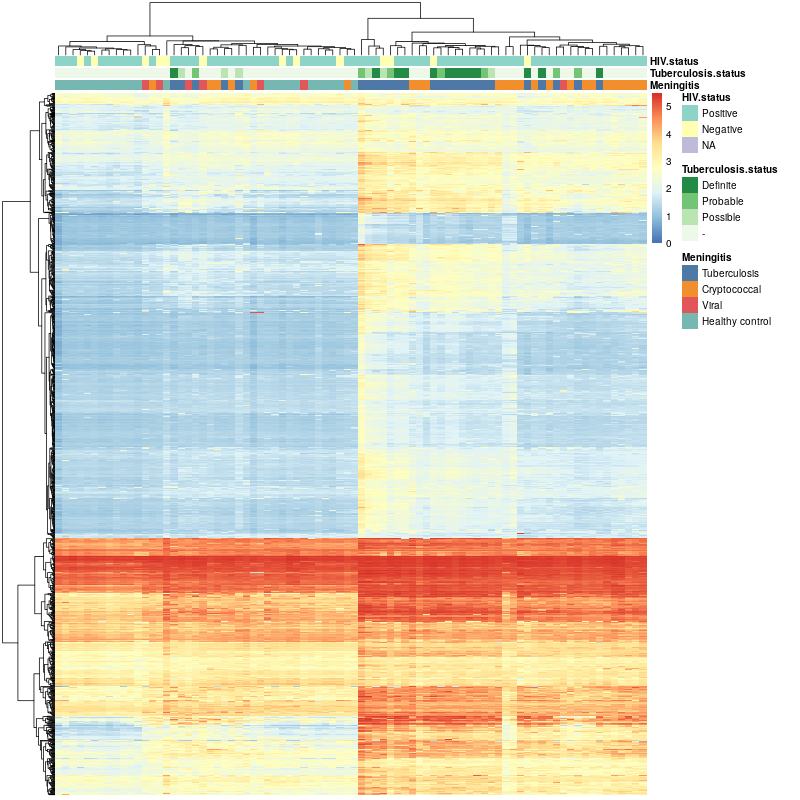

In [48]:
%%R -w 800 -h 800 -u px
pheatmap(
    log10(matrix),
    show_colnames=FALSE,
    show_rownames=FALSE,
    annotation_col=patient_annotations,
    annotation_colors=patient_colors
)

Z-score, protein-wise (log10 transform skipped on purpose):

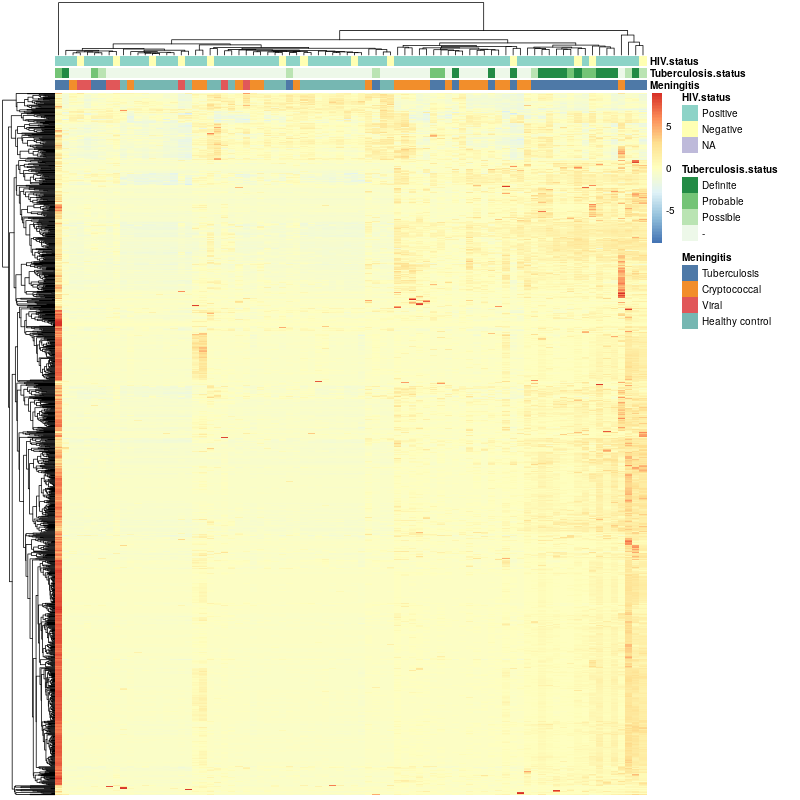

In [49]:
%%R -w 800 -h 800 -u px
pheatmap(
    matrix,
    show_colnames=FALSE,
    show_rownames=FALSE,
    annotation_col=patient_annotations,
    annotation_colors=patient_colors,
    scale='row' # this enables z-score, row-wise
)

Regardless of transformation:
- The clustering looks nice! Many tuberculosis patients are in the same cluster, similarly the cryptococcal patients. There is some overlap.
- No clear clustering by HIV status

Log-10 transformation highlights:
- Seems to place all the healthy controls on the left cluster and most of the meningitis patients to the right cluster.  

The z-score transformation highlights that:
- One patient is an outlier, with values much higher than average for most genes.

The outlier patient is:

In [50]:
matrix.mean().argmax()

'024.TMR'

### Choosing linkage method and distance

- Definitely not "single" linkage, prefer "complete" over "average" [(D'haeseleer, 2005)](https://www.nature.com/articles/nbt1205-1499)
- Ward linkage and Pearson correlation distance may be better for proteomics data [(Meunier, 2007)](https://pubs.acs.org/doi/full/10.1021/pr060343h)

My intuition for the distance function choice:
- Pearson correlation will tend to group together patients with similar patterns of relative protein abundances
- Euclidean distance will tend to group together patients with similar levels of proteins, giving less weight to the distribution patterns

Thus correlation may "correct" for the technical variation in samples.

I will continue to use log transformation:

In [51]:
log_matrix = matrix.applymap(log10)

But will refrain from any further transformations for now.

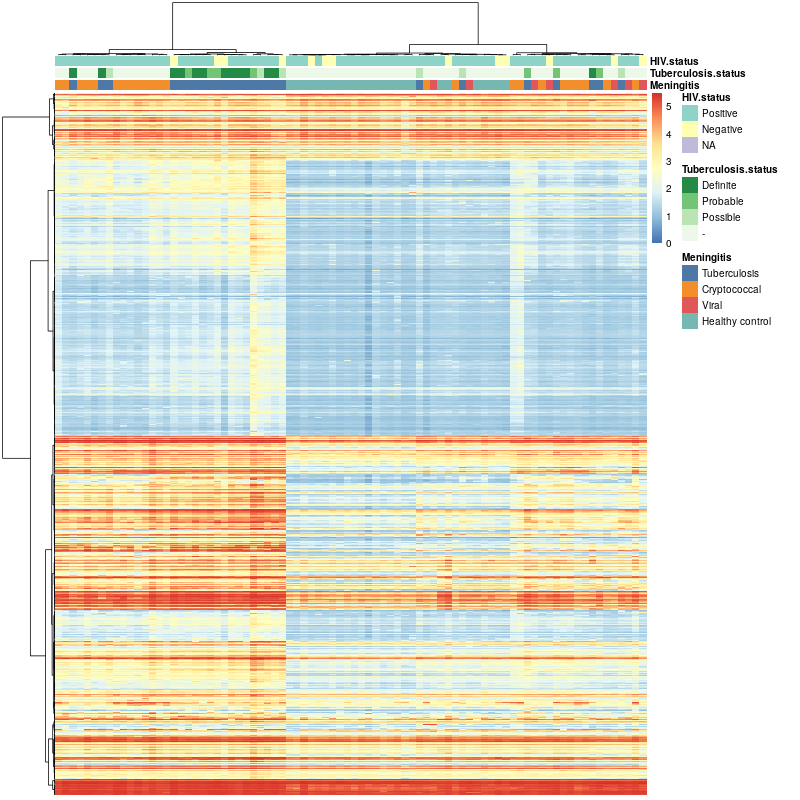

In [52]:
%%R -w 800 -h 800 -u px -i log_matrix -o log_clusters
colnames(log_matrix) <- sub('^X', '', colnames(log_matrix))

log_clusters = pheatmap(
    log_matrix,
    show_colnames=FALSE,
    show_rownames=FALSE,
    annotation_col=patient_annotations,
    annotation_colors=patient_colors,
    scale='none',
    clustering_method='ward',
    clustering_distance_cols='correlation',
    clustering_distance_rows='correlation'
)

### Further attempts to normalize/transform

Some thoughts on transformations:
- we may suspect that there will be less proteins in the healthy controls,
    - we could control for that if the goal is to elucidate differences in the immune system proxies or look for specific biomarkers (i.e. what immune-response related proteins are more often active in the CSF when compared against the background)
    - but not controlling is a real-life scenario: the mere fact of detecting much more proteins than expected might be used to help diagnose the patient
- log transformation reduces the problem of high dynamic range. However, it also over-emphasizes the proteins with very low levels [(Berg et al, 2006)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/) / common knowledge.
- z-score appears to be well suited for distributions closer to the normal family - as it uses mean and standard deviation
- it might be better to use the more robust median rather than mean as it is less prone to outliers [(Berg et al, 2006)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/) / common knowledge. However, log-transformation partially alleviates this problem (and there is little precedent such approach)
- I would be tempted to use an advanced transformation followed by scaling, though there is little precedent in the field. Also, this would reduce the ease of interpretation of results (everyone understands log-transform, but not necessarily Box-Cox)

A [review of HCA for proteomic data](https://pubs.acs.org/doi/full/10.1021/pr060343h) mentions an alternative being division by maximum value of each sample - I would not do that as this procedure may susceptible to outliers, though they demonstrate that it gives better results than z-score (though not on SOMAscan data which has greater dynamic range).

I propose to follow the log-transformation with:
 - z-score on samples (patients) - to address the issue of some samples having more proteins than others (which could be either technical or biological) - see 024.TMR (NB: the above discussed issue of the relative levels being potentially diagnostic is not necessarily important: confirming that more proteins in CSF may imply greater chance of a disease is not necessarily novel neither ambitious - I could just do a separate analysis for that); I could use modified z-score with median instead of mean (Iglewicz-Hoaglin) - though it does not seem to be necessary
 - z-score normalization of each feature (protein)

In [53]:
def z_score(v):
    return (v - v.mean()) / v.std()

In [54]:
z_log_matrix = log_matrix.apply(z_score).apply(z_score, axis=1)

While z-score transformation of one axis (patients/proteins) would not change the clustering when the distance function is correlation, it is not true for clustering on the other axis. Thus z-transformation may change the clustering results.

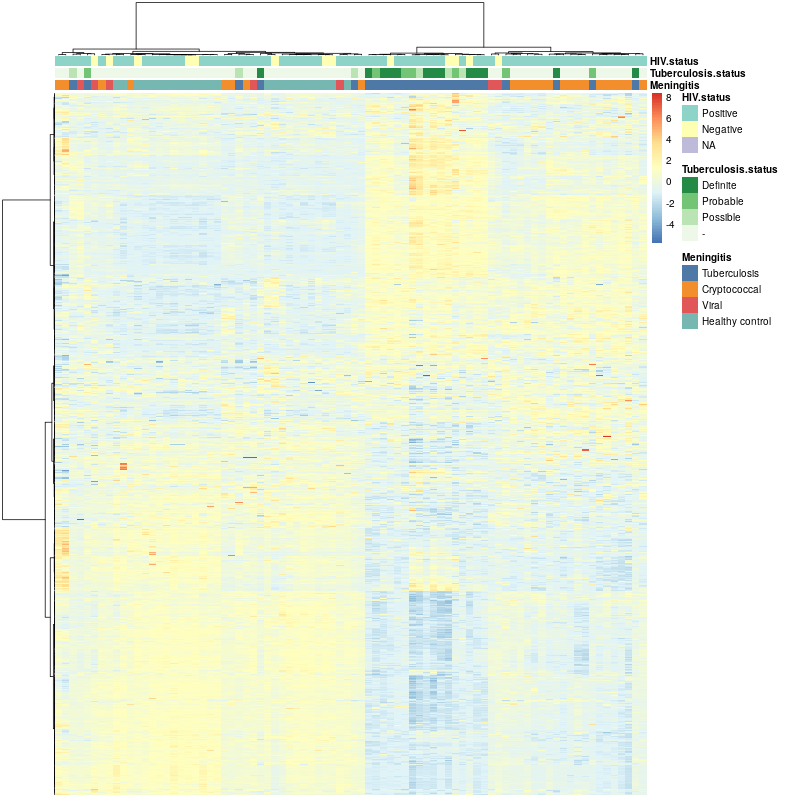

In [55]:
%%R -w 800 -h 800 -u px -i z_log_matrix -o z_log_clusters
colnames(z_log_matrix) <- sub('^X', '', colnames(z_log_matrix))

z_log_clusters = pheatmap(
    z_log_matrix,
    show_colnames=FALSE,
    show_rownames=FALSE,
    annotation_col=patient_annotations,
    annotation_colors=patient_colors,
    scale='none',
    clustering_method='ward',
    clustering_distance_cols='correlation',
    clustering_distance_rows='correlation'
)

As the patient clustering is visibly good enough as for the initial analysis, I will stop here.

An alternative would be to explore top-bottom clustering as an addition.

### Analysis - patient clustering

In [56]:
%R library('factoextra');

In [57]:
%%R
# these are simply hclust results
log_patient_clusters = log_clusters$tree_col
z_log_patient_clusters = z_log_clusters$tree_col

#### Log-transformed

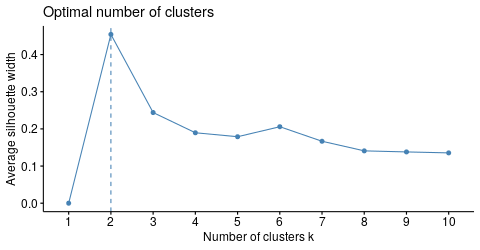

In [58]:
%%R -h 250 -u px
fviz_nbclust(
    t(log_matrix), # transpose to cluster patients, not proteins
    hcut, method='silhouette', hc_metric='pearson', hc_method='ward.D2'
)

I will ignore the suggestion of selecting two clusters - we know that there are at least four distinct patient groups. I do not show plots for elbow method/RSS as these have the same issue.

I will choose $k=6$ for the log-transformed clustering as there is a visible drop at $k=$ (and we want $k>=4$).

In [59]:
%%R
log_subgroups = cutree(log_patient_clusters, 6)

Simple PCA visualization:

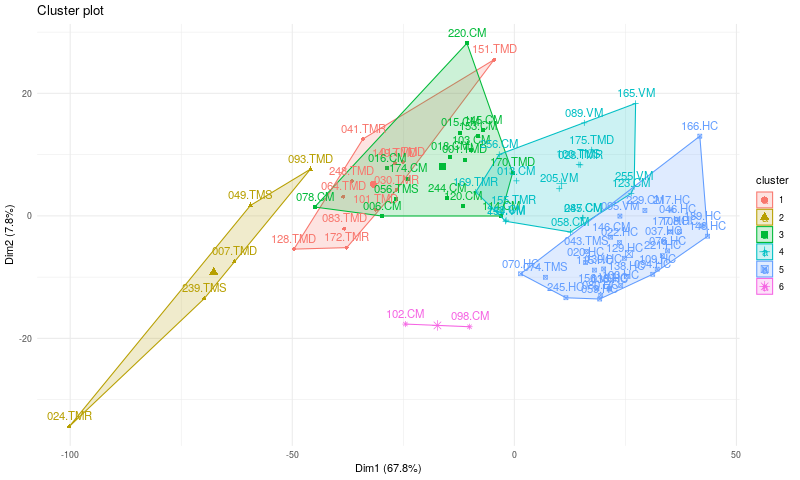

In [60]:
%%R -w 800 -u px
fviz_cluster(list(data=t(log_matrix), cluster=log_subgroups)) + theme_minimal()

Well, the data was not normalized.

#### Log-z-transformed "normalized"

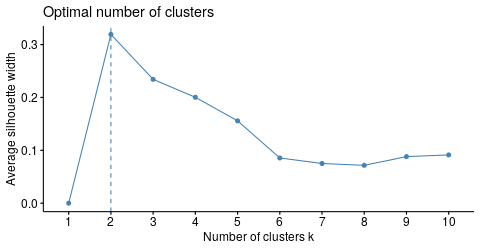

In [61]:
%%R -h 250 -u px
fviz_nbclust(t(z_log_matrix), hcut, method='silhouette', hc_metric='pearson', hc_method='ward.D2')

I will choose $k = 4$ as it is the minimal assumed number of clusters.

In [62]:
%%R
z_log_subgroups = cutree(z_log_patient_clusters, 4)

Simple PCA

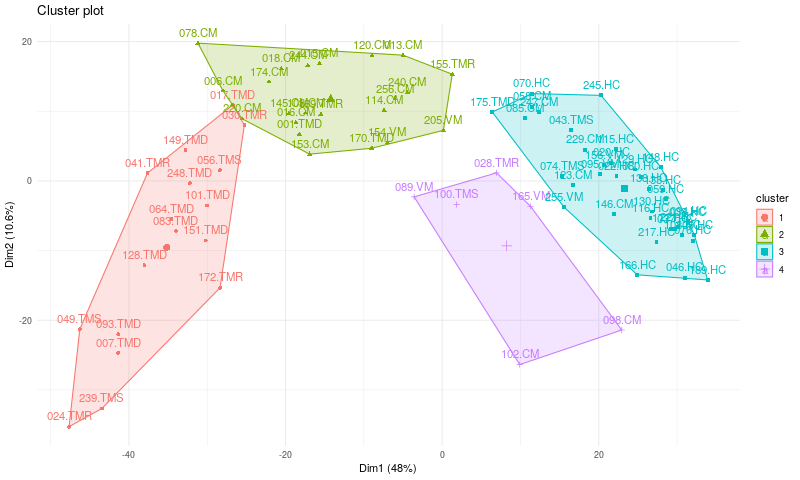

In [63]:
%%R -w 800 -u px
fviz_cluster(list(data=t(z_log_matrix), cluster=z_log_subgroups)) + theme_minimal()

#### Z-score vs log-transform only?

In [64]:
%R library(dendextend);

The clusterings are visibly different, even after untangling:

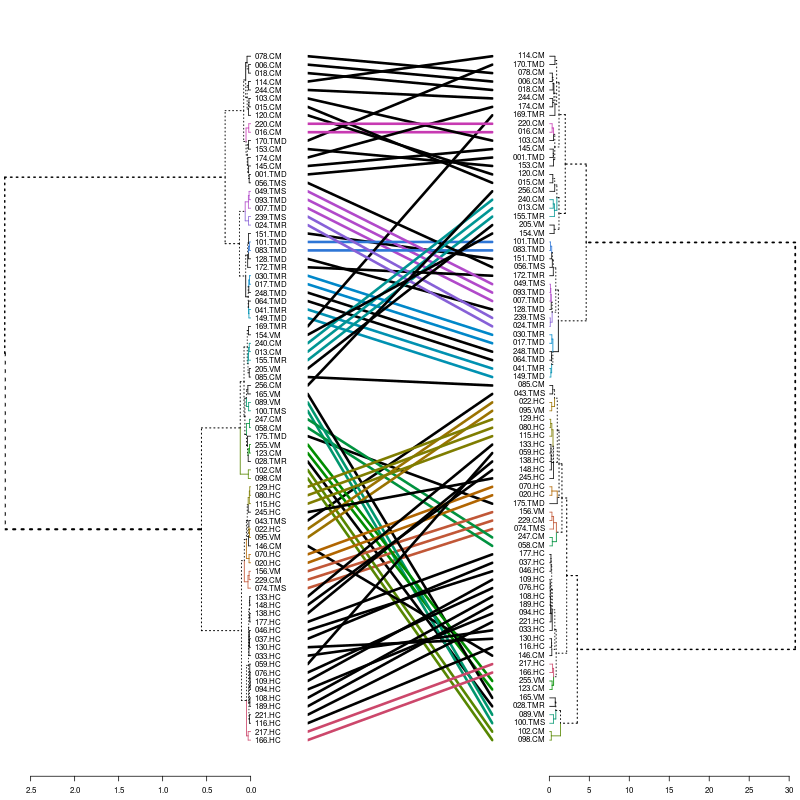

In [65]:
%%R -w 800 -h 800 -u px
patient_clusterings = dendlist(
    as.dendrogram(log_patient_clusters),
    as.dendrogram(z_log_patient_clusters)
)

tanglegram(
    untangle(patient_clusterings, method="step1side"),
    common_subtrees_color_branches=T,
    margin_inner=6,
    highlight_distinct_edges=T,
)

### Analysis - protein clustering

In [66]:
%%R
log_protein_clusters = log_clusters$tree_row
z_log_protein_clusters = z_log_clusters$tree_row

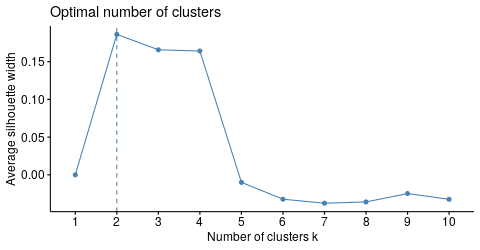

In [67]:
%%R -h 250 -u px
fviz_nbclust(log_matrix, hcut, method='silhouette', hc_metric='pearson', hc_method='ward', nboot = 500)

Average silhouette is visibly lower.

Using $k=4$.

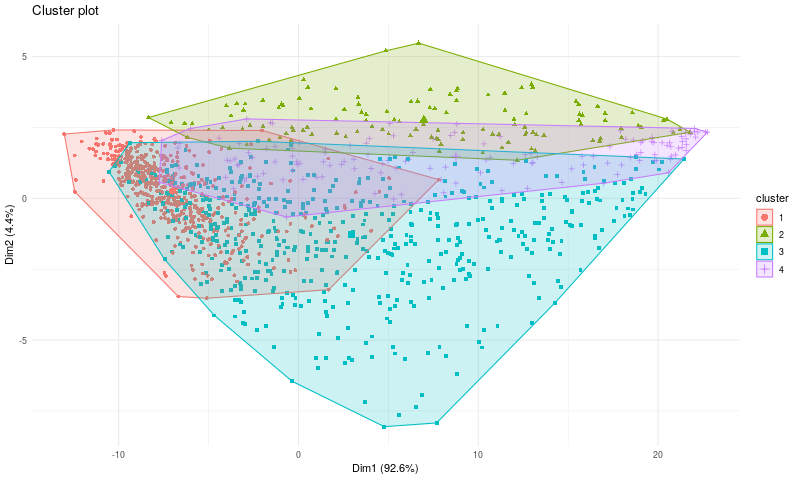

In [68]:
%%R -w 800 -u px
log_subgroups = cutree(log_protein_clusters, 4)
fviz_cluster(list(data=log_matrix, cluster=log_subgroups), geom='point') + theme_minimal()

#### Log-z-transformed "normalized"

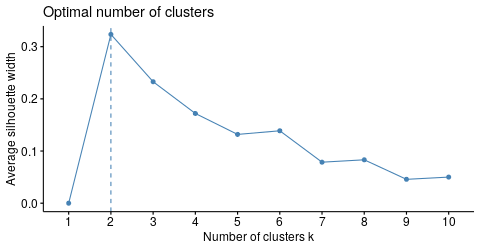

In [69]:
%%R -h 250 -u px
fviz_nbclust(z_log_matrix, hcut, method='silhouette', hc_metric='pearson', hc_method='ward')

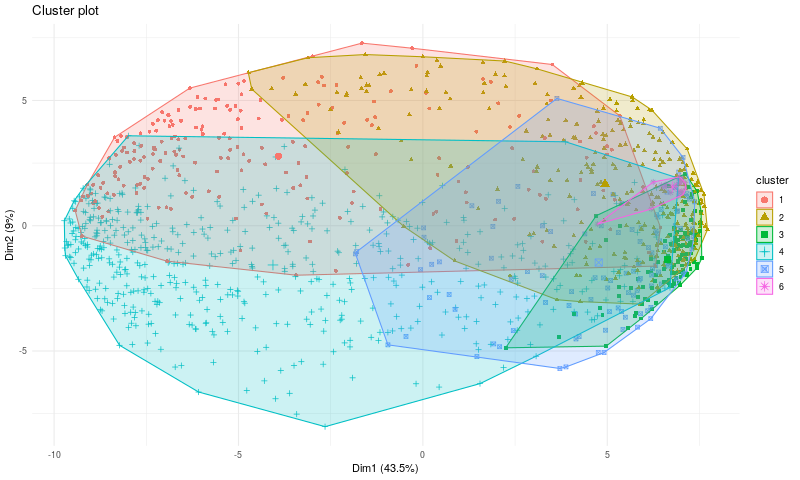

In [70]:
%%R -w 800 -u px
z_log_subgroups = cutree(log_protein_clusters, 6)
fviz_cluster(list(data=z_log_matrix, cluster=z_log_subgroups), geom='point') + theme_minimal()

### Summary

TODO: Compare the clusterings with alluvial/different metrics?

### PCA

In [71]:
%%R
pca = prcomp(t(z_log_matrix), scale=F)

Eigenvalues:

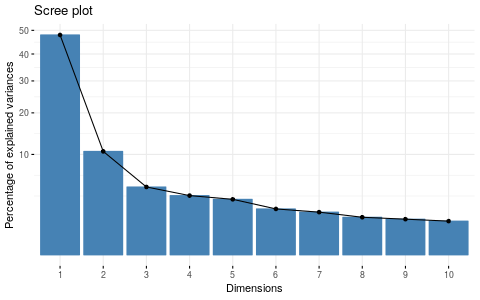

In [72]:
%%R -h 300 -u px
fviz_eig(pca) + scale_y_sqrt()

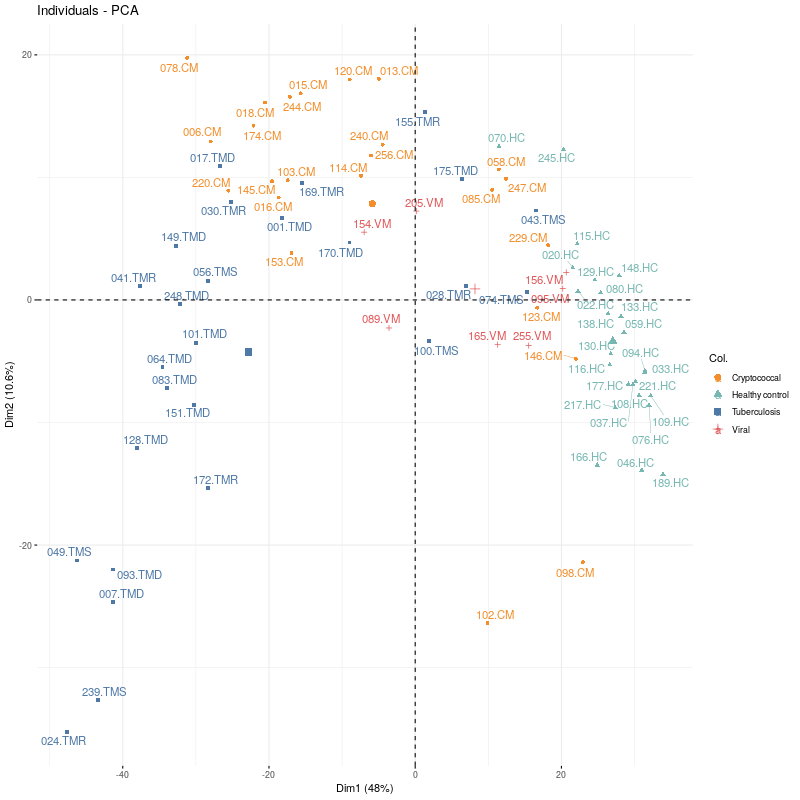

In [73]:
%%R -w 800 -h 800 -u px
fviz_pca_ind(
    pca,
    repel=T,
    col.ind=patient_annotations$Meningitis,
    palette=patient_colors$Meningitis
)

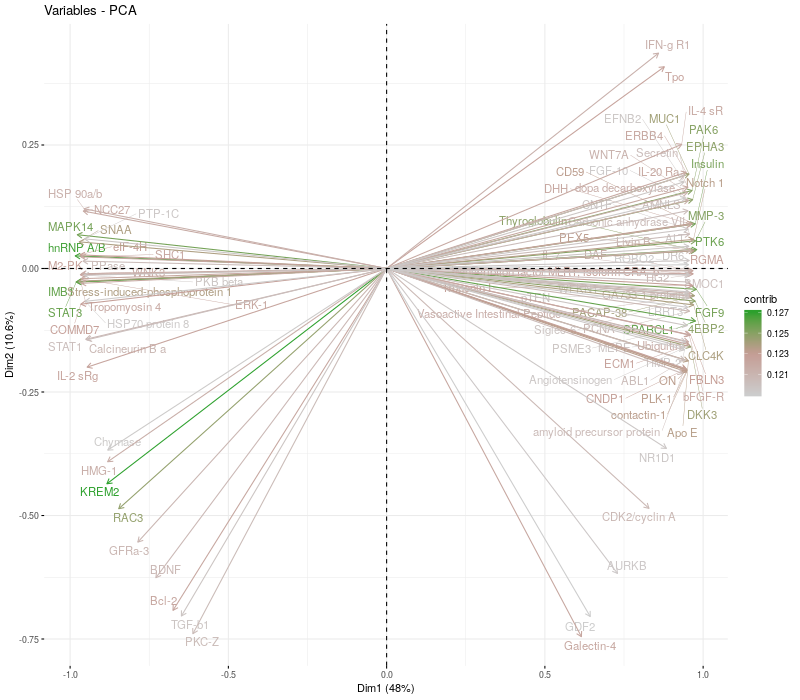

In [74]:
%%R -w 800 -h 700 -u px
fviz_pca_var(
    pca, repel=T,
    col.var="contrib",
    gradient.cols=c("#cccccc", "#c49c94", "#2CA02C"),
    select.var=list(contrib=100)
)

### Increasing interpretability - gene ontology analysis

In [75]:
%%R
source('helpers/small_cluster_plots.R')

#### Gene ontology enrichment

I will highlight proteins of genes associated with major biological processes of the cell.

I use Gene Ontology (though it is less specific than let say PRO - a protein ontology) as it is an established standard and "behaves well". I can change it to use another ontology if you wish to proceed with this kind of analyses.

To get curated GO-protein associations for UniProt accessions I use [GOA from EBI](https://www.ebi.ac.uk/GOA).

In [76]:
!wget ftp://ftp.ebi.ac.uk/pub/databases/GO/goa/HUMAN/goa_human.gaf.gz -N -q
!gunzip goa_human.gaf.gz -q -f

In [77]:
from goatools.associations import read_gaf
from goatools.obo_parser import GODag
from goatools.base import download_go_basic_obo

download_go_basic_obo();

  EXISTS: go-basic.obo


In [78]:
from helpers.ontology import ProteinOntologyClassifier

In [79]:
classifier = ProteinOntologyClassifier(
    ontology=GODag("go-basic.obo"),
    associations=read_gaf('goa_human.gaf')
)

go-basic.obo: fmt(1.2) rel(2019-03-19) 47,381 GO Terms
  READ      476,061 associations: goa_human.gaf


In [80]:
processes = classifier.classify(
    index=relevant_aptamers.Target,
    proteins=relevant_aptamers.UniProt,
    parent_term='biological_process'
)

What are the common/rare processes?

As we analyze only a fraction of the proteome, the analyzed proteins may over-represent certain processes.

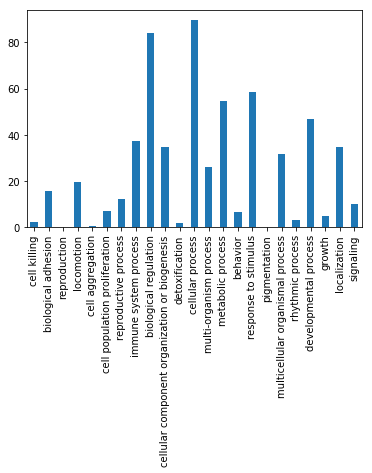

In [81]:
measured_proteins_with_process_ratio = (processes.sum() / len(processes) * 100)
measured_proteins_with_process_ratio.plot(kind='bar');

#### Major biological processes

In [82]:
from helpers.ontology import transform_to_classes

In [83]:
processes_matrix = transform_to_classes(z_log_matrix, processes)

Going to loose signal from 4.52% (59) proteins


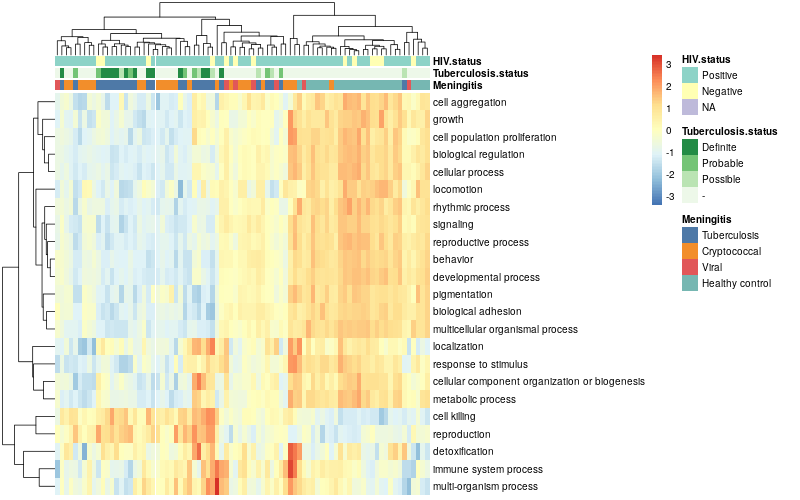

In [84]:
%%R -w 800 -h 500 -u px -i processes_matrix
small_heatmap(processes_matrix)

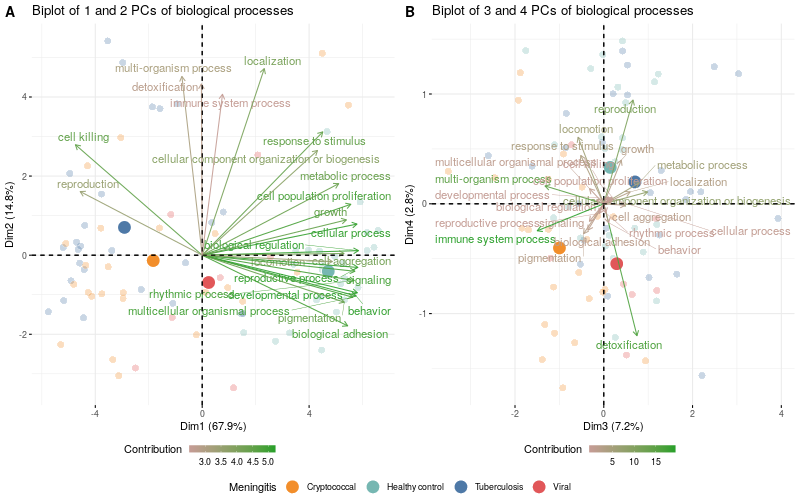

In [85]:
%%R -w 800 -h 500 -u px
first_four_pcs(processes_matrix, 'biological processes')

#### Molecular functions

In [86]:
functions = classifier.classify(
    index=relevant_aptamers.Target,
    proteins=relevant_aptamers.UniProt,
    parent_term='molecular_function'
)
functions_matrix = transform_to_classes(z_log_matrix, functions)

Going to loose signal from 6.05% (79) proteins


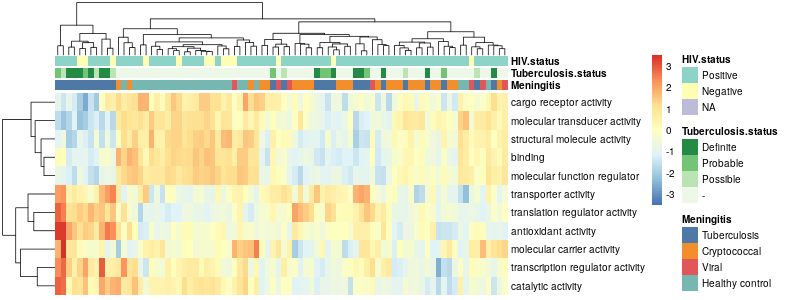

In [87]:
%%R -w 800 -h 300 -u px -i functions_matrix
small_heatmap(functions_matrix)

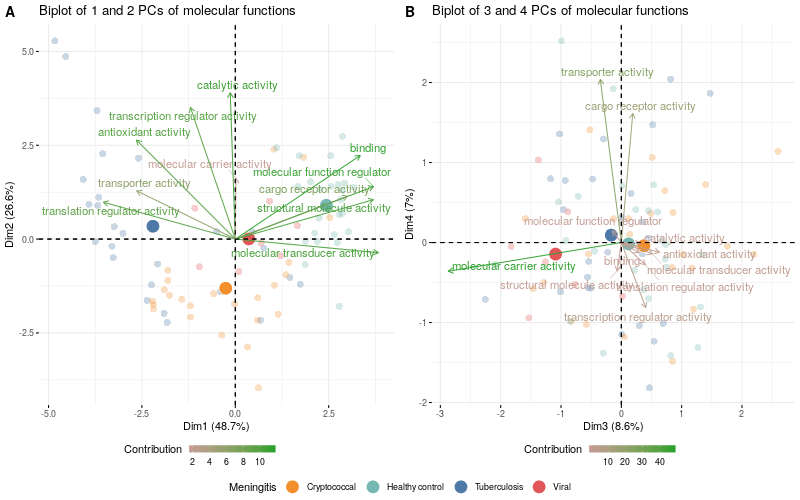

In [88]:
%%R -w 800 -h 500 -u px
first_four_pcs(functions_matrix, 'molecular functions')

#### Cellular components

In [89]:
components = classifier.classify(
    index=relevant_aptamers.Target,
    proteins=relevant_aptamers.UniProt,
    parent_term='cellular_component'
)
components_matrix = transform_to_classes(z_log_matrix, components)

Going to loose signal from 5.44% (71) proteins


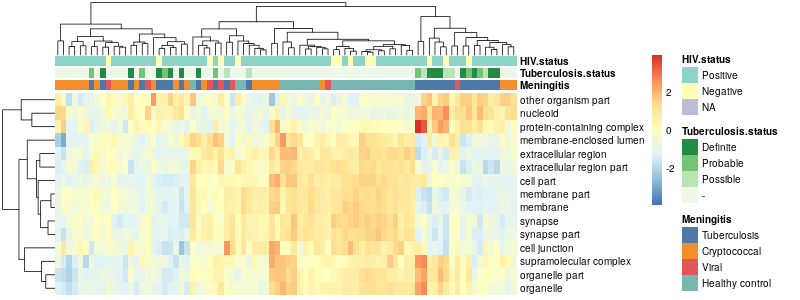

In [90]:
%%R -w 800 -h 300 -u px -i components_matrix
small_heatmap(components_matrix)

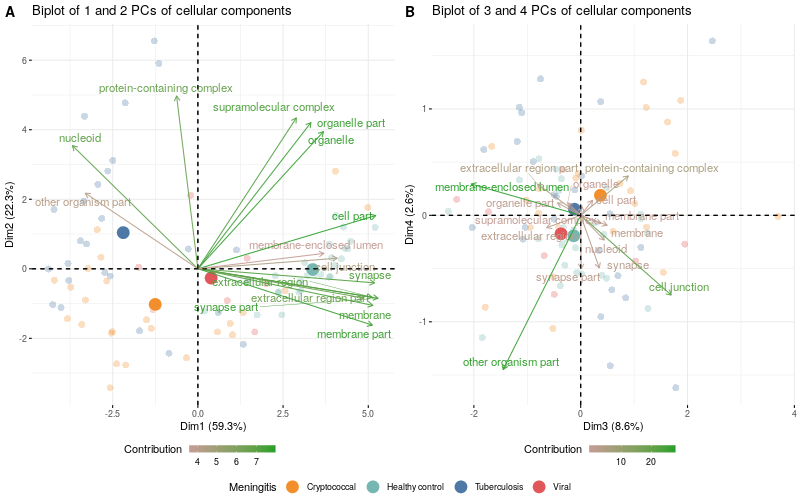

In [91]:
%%R -w 800 -h 500 -u px
first_four_pcs(components_matrix, 'cellular components')

Given little viral proteins and no bacterial proteins presence of nucleoid is a bit surpising. What proteins are in there?

In [92]:
list(components[components.nucleoid == True].index)

['ATP synthase beta chain']

Just one!

In [93]:
aptamers.query('Target == "ATP synthase beta chain"').UniProt

237    P06576
Name: UniProt, dtype: object

So here "nucleoid" refers to a region of human mitochondrium!

# RNA-Seq

In [94]:
!ls data/clean/rna/

all_samples.csv  definite_tbm_against_all.csv  definite_tbm_subset.csv


In [95]:
rna_levels = read_csv('data/clean/rna/all_samples.csv', index_col=[0,1])